In [22]:
## Remove the id's, SurName, Normalize credit scrore, hot encoding the geogrpajghy, gender binary, normalize tenure, age, num of products leave as is, hasCard, IsAcitve memeber, salary/Balance predict estimated salary/Balance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error


In [4]:

df = pd.read_csv('Churn_Modelling.csv')
y = df['EstimatedSalary'].values
df = df.drop('EstimatedSalary', axis=1)
df = df.drop('CustomerId', axis=1)
df = df.drop('Surname', axis=1)

# Perform one-hot encoding on the "Geography" and "Gender" column
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

x = df.iloc[:,:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
df.head()




,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,0,0,0,1,1,0


#Predicting Estimated Salaries
##looking at this data we want to try and see if we can predict a Estimated salary based on all the information we have, so first we remove any outliers, clean the data by hot encoding or binary clasiffy any data and then split our data into training, and testing to make sure we havent over fitted our training set

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with mixed feature types
# Let's say 'Feature1', 'Feature2', ... are numerical and others are hot-encoded/binary

# Separate numerical and categorical features
numerical_features = ['Balance']  # replace with your numerical feature names
categorical_features = [col for col in df.columns if col not in numerical_features]

# Handling Outliers in Numerical Features
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
filter = ~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered = df[filter]

# Normalize only numerical features
scaler = StandardScaler()
df_filtered[numerical_features] = scaler.fit_transform(df_filtered[numerical_features])

# Merge back with categorical features
df_final = pd.concat([df_filtered[numerical_features], df_filtered[categorical_features]], axis=1)

# You can now proceed with df_final for your regression analysis
x = df_final.iloc[:,:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
df_final.head()

,Balance,RowNumber,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.225848,1,619,42,2,1,1,1,1,1,0,0,1,0
1,0.117350,2,608,41,1,1,0,1,0,0,0,1,1,0
2,1.333053,3,502,42,8,3,1,0,1,1,0,0,1,0
3,-1.225848,4,699,39,1,2,0,0,0,1,0,0,1,0
4,0.785728,5,850,43,2,1,1,1,0,0,0,1,1,0


In [12]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Ridge Regression
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}

ridge = Ridge()
clf = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Reduced MSE:", -clf.best_score_)

Mean Squared Error: 3315187712.634323
Best parameters: {'alpha': 1000}
Reduced MSE: 3313286925.8786354


#Results
##It seems as the RMSE valuse indicates a number of things, 1 our data normalization and removing of outliers might have helped the model learn some paramters of prediction, while still sticking to a large learning rate, this can mean that there is not alot of correlation between the feature vector

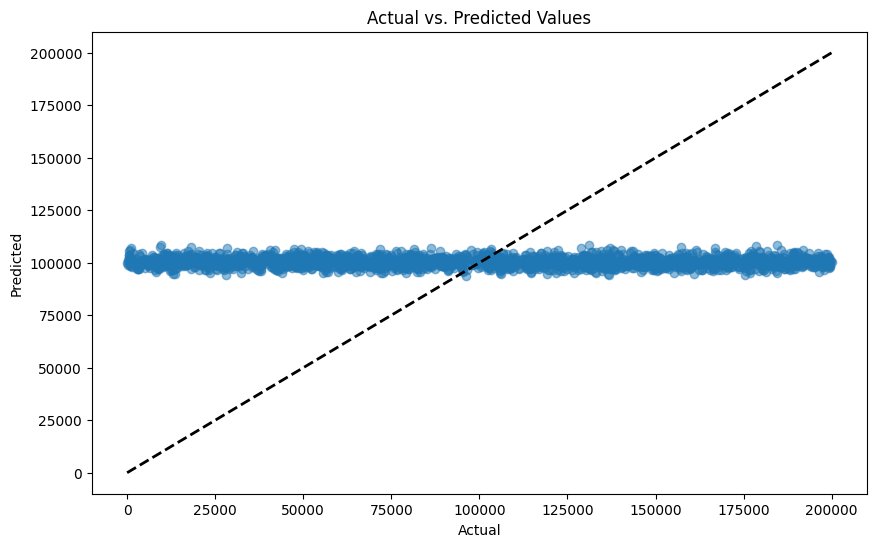

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

plt.show()

#Predicting Balances
##Another thing we want to try is that we want to try and see if we can predict a balance based on all the information we have, so first we remove any outliers, clean the data by hot encoding or binary clasiffy any data and then split our data into training, and testing to make sure we havent over fitted our training set

In [16]:

df = pd.read_csv('Churn_Modelling.csv')
y = df['Balance'].values
df = df.drop('Balance', axis=1)
df = df.drop('CustomerId', axis=1)
df = df.drop('Surname', axis=1)

# Perform one-hot encoding on the "Geography" and "Gender" column
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

x = df.iloc[:,:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
df.head()


# Separate numerical and categorical features
numerical_features = ['EstimatedSalary']  # replace with your numerical feature names
categorical_features = [col for col in df.columns if col not in numerical_features]

# Handling Outliers in Numerical Features
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
filter = ~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered = df[filter]

# Normalize only numerical features
scaler = StandardScaler()
df_filtered[numerical_features] = scaler.fit_transform(df_filtered[numerical_features])

# Merge back with categorical features
df_final = pd.concat([df_filtered[numerical_features], df_filtered[categorical_features]], axis=1)

# You can now proceed with df_final for your regression analysis
x = df_final.iloc[:,:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Ridge Regression
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}

ridge = Ridge()
clf = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
clf.fit(x_train, y_train)

print("Best parameters:", clf.best_params_)
print("Reduced MSE:", -clf.best_score_)

Mean Squared Error: 2900402131.7604117
Best parameters: {'alpha': 10}
Reduced MSE: 2923655871.0915275


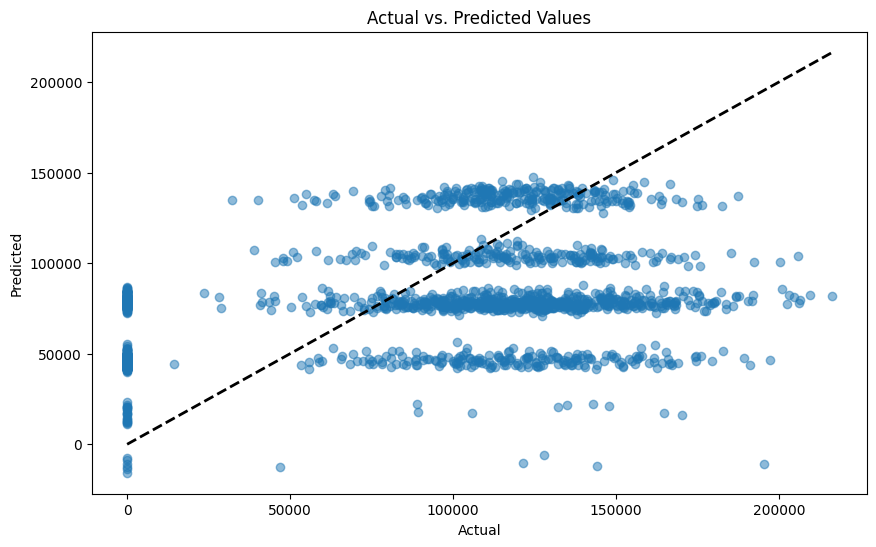

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

#Results
##It seems as the RMSE valuse indicates a number of things, 1 our data normalization and removing of outliers have not helped the model learn some paramters of prediction, while still sticking to a large erorr, this can mean that there is not alot of correlation between the feature vectors and the variable being predicted which in this case is Estimated salary


##Lets do logisitc regresion based on wether or not a user exited

In [23]:

df = pd.read_csv('Churn_Modelling.csv')
y = df['Exited'].values
df = df.drop('Exited', axis=1)
df = df.drop('CustomerId', axis=1)
df = df.drop('Surname', axis=1)

# Perform one-hot encoding on the "Geography" and "Gender" column
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

x = df.iloc[:,:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
df.head()




model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [25]:
print(conf_matrix)
print('accuracy:',accuracy)

[[1567   40]
 [ 366   27]]
accuracy: 0.797


#Confusion Matrix Breakdown:
#True Positives (TP): 27 - The model correctly predicted 27 instances where individuals did exit.
#True Negatives (TN): 1567 - The model correctly predicted 1567 instances where individuals did not exit.
#False Positives (FP): 40 - The model incorrectly predicted 40 instances where individuals would exit, but they did not.
#False Negatives (FN): 366 - The model failed to predict 366 instances where individuals did exit.

#Accuracy: 0.797 - This means that the model correctly predicted whether someone would exit or not in approximately 79.7% of the cases. This is a reasonably high accuracy rate, suggesting that the model is fairly reliable in its predictions.

#Precision: Given the relatively low number of True Positives (27) compared to False Positives (40), the precision (the ability of the model to correctly identify those who will exit) might be low. This means the model might be overestimating the number of individuals who will exit.
#Recall: The recall (the ability of the model to identify all individuals who actually exit) is likely to be low because of the high number of False Negatives (366). This suggests that while the model is good at predicting who will not exit, it's not as effective at identifying all of those who will.